<a href="https://colab.research.google.com/github/someaditya/toxicity-classification/blob/master/toxicity_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Engineer Nanodegree Capstone Project**
## **Identification and Classification of Toxic Comments**

### By Some Aditya Mandal



As of the first quarter of 2020, there are over 4.5 billion internet users all over the world while social media users have passed the 3.8 billion mark. Nearly 60 percent of the world’s population is already online, and the latest trends suggest that more than half of the world’s total population will use social media by the middle of this year.

The idea of social media, online forums and discussion sections is to provide a platform for meaningful discussion for internet users. But a major problem faced by most of these platforms is toxic comments. In this context, toxicity can be defined as 'anything that is rude, disrespectful, or otherwise likely to make someone leave a discussion'. The threat of abuse and harassment online means that many people stop to express themselves and give up on seeking different opinions. Platforms across struggle to effectively facilitate conversations, leading many communities to moderate and limit or completely shut down user comments.

The emergence of massive social networking websites like Facebook, Twitter and Reddit lead to millions of people posting content and commenting on them. People
including children interact in the internet and there is a need to control the content and encourage a healthy environment and facilitate conversations, and ensure that
they don’t give up on stop expressing themselves. Many news websites now have started disabling comments sections.Most of these websites have human moderators behind them monitoring them constantly which is very inefficient.


In 2017, around 2 million comments were released by the Civil Comments Platform when it shut down in an effort to help researchers improve civility in online conversations. Jigsaw, an Alphabet company, adopted this goal and further annotated the data set for research purposes. 

This capstone project will focus on the Identification and Classification of Toxic Comments , which
aims to detect toxicity across a diverse range of conversations.
 


## **Problem Statement**

The problem comes under Natural Language Processing, a sentiment analysis problem. The aim of this capstone project is to build a machine learning model that can
classify toxicity of a given text using machine learning methods. 

Several researches has been performed using different machine learning models to classify toxic interactions in the past and the efficiency of neural networks in classification of toxic comments were proven.

### **Project Setup**

Here we will import the initially required libraries.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sb
import tensorflow as tf
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Checking Colab allocation of GPU

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon May  4 09:36:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    31W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  


This kernel is hosted in [Google Colab](https://https://colab.research.google.com/). This step mounts [Google Drive](https://drive.google.com) in to the Colab workspace. Google Drive is utilised to store the [Kaggle Dataset](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) and [FastText English Word Vectors](https://fasttext.cc/docs/en/english-vectors.html).

To read more about other ways to use External data in Google Colab , please read this [Colab Notebook](https://colab.research.google.com/notebooks/io.ipynb). 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Checking if the datasets are correctly mounted in the workspace.

In [5]:
!ls "/content/drive/My Drive/toxicity-classification/data"

sample_submission.csv  test.csv  test_labels.csv  train.csv


Importing the dataset in the notebook.

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/toxicity-classification/data/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/toxicity-classification/data/test.csv')
test_labels = pd.read_csv('/content/drive/My Drive/toxicity-classification/data/test_labels.csv')
# merge test labels with the original test dataset
test_data_final = pd.merge(test_data, test_labels, on='id')
# remove test data not used in scoring - these have labels of -1 for all toxicity subtypes
test_data_final.drop(test_data_final.loc[test_data_final['toxic']==-1].index, inplace=True)

### **Dataset Analysis**
Here we take a high level view of the datasets we will be working with.


The dataset is a large number of Wikipedia comments which have been labeled by human raters for toxic behavior and this dataset was made public on Kaggle by Jigsaw and Google ( Both Alphabet Company) as part of their competetion ["Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview)".

The training and test datasets are publicly available on Kaggle and the training dataset has following column names:

* id
* comment_text
* toxic
* severe_toxic
* obscene
* threat
* insult
* identity_hate

Checking examples of the training and test data.

In [7]:
train_data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [8]:
test_data_final.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
16,000663aff0fffc80,this other one from 1897,0,0,0,0,0,0
17,000689dd34e20979,== Reason for banning throwing == \n\n This ar...,0,0,0,0,0,0
19,000844b52dee5f3f,|blocked]] from editing Wikipedia. |,0,0,0,0,0,0
21,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",1,0,0,0,0,0
22,000968ce11f5ee34,Please stop. If you continue to vandalize Wiki...,0,0,0,0,0,0


Check for repeated values, null values and overall statistics of the dataset.

In [9]:
print(any(train_data['id'].duplicated())) # see if id values are repeated
print(train_data.isnull().values.any()) # check for any n/a values
display(train_data.describe()) # check statistics of each classification

False
False


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking details of training and test datasets.


In [10]:
train_size = train_data.shape[0]
test_size = test_data_final.shape[0]
total_count = train_size + test_size
print(f"Number of training examples {train_size}")
print(f"Number of test examples {test_size}")
print(f"Train/Test Ratio: {round(train_size/total_count * 100, 2)}% / {round(test_size/total_count * 100, 2)}%")

Number of training examples 159571
Number of test examples 63978
Train/Test Ratio: 71.38% / 28.62%


The training dataset contains 160,000 rows (with the above 8 columns) while the initial test set contains 63,000
rows, with just 2 columns (the id and comment_text ). 


Checking the training dataset based on toxicity.

In [11]:
# add a new column 'none' to indicate no toxicity
train_data_new = train_data.copy()
comment_category_totals=train_data.iloc[:,2:].sum(axis=1)
train_data_new['none']=(comment_category_totals==0)
print(f"Comments with no toxicity: {train_data_new['none'].sum()}")
print(f"% of total training dataset marked as not toxic: {train_data_new['none'].sum()/len(train_data_new)}")

Comments with no toxicity: 143346
% of total training dataset marked as not toxic: 0.8983211235124177


In [12]:
print(train_data_new[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'none']].sum())

toxic             15294.0
severe_toxic       1595.0
obscene            8449.0
threat              478.0
insult             7877.0
identity_hate      1405.0
none             143346.0
dtype: float64


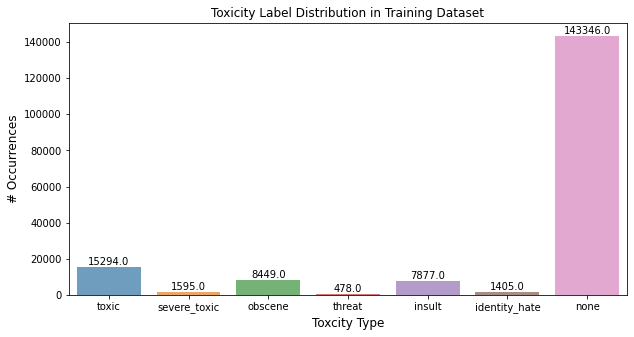

In [13]:
x_vals=train_data_new.iloc[:,2:].sum()
plt.figure(figsize=(10,5))
axes = sb.barplot(x_vals.index, x_vals.values, alpha=0.7)
plt.title("Toxicity Label Distribution in Training Dataset")
plt.ylabel('# Occurrences', fontsize=12)
plt.xlabel('Toxcity Type', fontsize=12)
rectangles = axes.patches
labels = x_vals.values
for rectangle, label in zip(rectangles, labels):
    height = rectangle.get_height()
    axes.text(rectangle.get_x() + rectangle.get_width()/2, height + 5, label, va='bottom', ha='center')
plt.show()

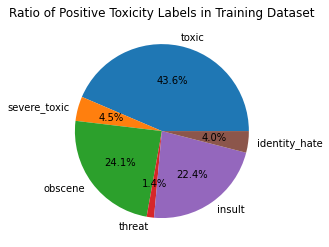

In [14]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plt.title('Ratio of Positive Toxicity Labels in Training Dataset')
plt.pie(train_data_new[labels].sum(), labels=labels, autopct='%1.1f%%')
plt.show()

In the above analysis, we notice a few things - first, the training dataset is highly imbalanced with regards to comment classification labels. We see that almost 90% of the comments has no toxicity label. Brief investigation of the training set reveals that most of the comments do not have a toxicity classification, and the percentages of toxic classifications are not even - 'toxic' ratings are much more prevalent (15,000 examples) with 'obscene' and 'insult' (around 8,000 each) at nearly half that amount and the rest at or below 1,500 examples each. While not as bad as say the perennial spam dataset example where 1% of the data is classied as spam and the rest is not spam. We also note that the training data is 70% of the total data, which seems typical.

In [0]:
# Word count in each comment:
train_data_new['count_word'] = train_data_new["comment_text"].apply(lambda x: len(str(x).split()))

# Unique word count
train_data_new['count_unique_word'] = train_data_new["comment_text"].apply(lambda x: len(set(str(x).split())))

# percentage of unique words
train_data_new['word_unique_percent'] = train_data_new['count_unique_word']*100/train_data_new['count_word']

# marking comments without any tags as "clean".
rowsums = train_data_new.iloc[:,2:7].sum(axis=1)
train_data_new['clean'] = np.logical_not(rowsums).astype('int')

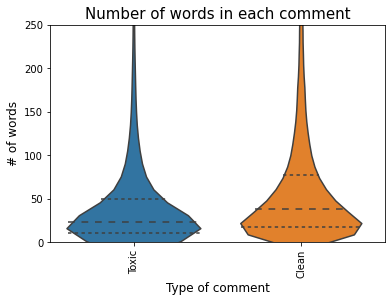

In [16]:
import seaborn as sns
# word count
axes = sns.violinplot(y='count_word', x='clean', data=train_data_new,split=True, inner="quart")
axes.set_xlabel('Type of comment', fontsize=12)
axes.set_ylabel('# of words', fontsize=12)
axes.set_ylim([0, 250])
axes.set_xticklabels(['Toxic', 'Clean'], rotation='vertical', fontsize=10)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

The above plot indicates that the number of words in each comment in both clean and toxic comments is mostly between 10 to 50. And toxic comments are much more likely to have fewer words indicated by the bulk near ~20 range.

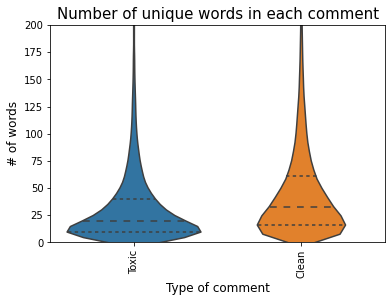

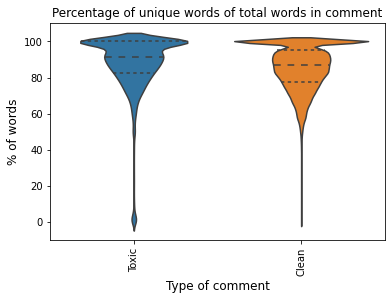

In [17]:

# unique word count
plt.title("Number of unique words in each comment", fontsize=15)
axes = sns.violinplot(y='count_unique_word', x='clean', data=train_data_new,split=True, inner="quart")
axes.set_xlabel('Type of comment', fontsize=12)
axes.set_ylabel('# of words', fontsize=12)
axes.set_ylim([0, 200])
axes.set_xticklabels(['Toxic', 'Clean'], rotation='vertical', fontsize=10)
plt.show()

# percentage of unique words
plt.title("Percentage of unique words of total words in comment")
axes = sns.violinplot(y='word_unique_percent', x='clean', data=train_data_new,split=True, inner="quart")
axes.set_xlabel('Type of comment', fontsize=12)
axes.set_ylabel('% of words', fontsize=12)
axes.set_xticklabels(['Toxic', 'Clean'], rotation='vertical', fontsize=10)
plt.show()

The above graphs show that number of words and number of unique words in both clean and toxic comments are similar and the percentage of unique words indicate that the bulk of the words are unique only. Also, there is a very small bump in the percentage of unique words in toxic comments indicating that they are spam.

In [18]:
# check for nulls
train_data_new.isnull().any()

id                     False
comment_text           False
toxic                  False
severe_toxic           False
obscene                False
threat                 False
insult                 False
identity_hate          False
none                   False
count_word             False
count_unique_word      False
word_unique_percent    False
clean                  False
dtype: bool

### **Preprocessing data**
The input data that will be used to engineer and extract features is in the form of comment text. This input generally cannot be fed directly into machine learning models, and must first be converted into a large, sparse vector of numbers using tokenizing and vectorization. We will use Scikit Learn's [TfidVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) function to transform the dataset documents (i.e. comments) into a matrix of TF-IDF features after splitting by both words and characters. Here we will use the combined training and test sets to make the overall word feature vector as this is not actively doing any model training, but merely generating features which will be used to train our models - there are varying opinions on this mixing of datasets, but it is allowed to take this approach in Kaggle competitions and so we will do so here for ease of processing. Default English language stopwords will be used, accents will be stripped from characters, and we will start with 1-grams and the top 10,000 words for the **benchmark model**. Based on **Logistic Regression** with words and char n-grams.

### **Logistic Regression - Benchmark Model**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# combine training and test comments so we have the entire corpus of words and characters for vectorization
combined_comments = pd.concat([train_data['comment_text'], test_data_final['comment_text']])
word_vec = TfidfVectorizer(stop_words='english', analyzer='word', strip_accents='unicode', sublinear_tf=True,
                           token_pattern=r'\w{1,}', max_features=10000, ngram_range=(1,1))
word_vec.fit(combined_comments)
train_word_features = word_vec.transform(train_data['comment_text'])
test_word_features = word_vec.transform(test_data_final['comment_text'])

character_vec = TfidfVectorizer(analyzer='char', stop_words='english', strip_accents='unicode', sublinear_tf=True,
                               max_features=50000, ngram_range=(2,6))
character_vec.fit(combined_comments)
train_char_features = character_vec.transform(train_data['comment_text'])
test_char_features = character_vec.transform(test_data_final['comment_text'])

train_data_features = hstack([train_char_features, train_word_features])
test_data_features = hstack([test_char_features, test_word_features])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


In [0]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [21]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scores = []
predictions = pd.DataFrame.from_dict({'id': test_data_final['id']})
for class_name in class_names:
    train_target = train_data[class_name]
    classifier = LogisticRegression(C=0.1, solver='sag')

    cv_score = np.mean(cross_val_score(classifier, train_data_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    classifier.fit(train_data_features, train_target)
    predictions[class_name] = classifier.predict_proba(test_data_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

CV score for class toxic is 0.9697970628233056
CV score for class severe_toxic is 0.9877308555574199
CV score for class obscene is 0.9846536897392498
CV score for class threat is 0.9831760760447974
CV score for class insult is 0.9778954898263957
CV score for class identity_hate is 0.9743630864627324
Total CV score is 0.9796027100756501
CPU times: user 9min 13s, sys: 686 ms, total: 9min 13s
Wall time: 9min 13s


A custom function to calcualte the **Roc-Auc score** using test set labels provided by Kaggle.

In [0]:
from sklearn.metrics import roc_auc_score
def test_score(predicted_vals):
    '''Actual Kaggle competion score using test set labels provided after competition close'''
    actuals = test_labels.copy()
    actuals.drop(actuals.loc[actuals['toxic']==-1].index, inplace=True)
    scores_test = []
    for class_name in class_names:
        score = roc_auc_score(actuals[class_name], predicted_vals[class_name])
        scores_test.append(score)
    print('Test set score is {}'.format(np.mean(scores_test)))

In [23]:
test_score(predictions)

Test set score is 0.976488898924485


### **Support Vector Machine**

Here, we experiment with another popular machine learning algorithm for classification.

In [24]:
%%time
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

scores = []
predictions = pd.DataFrame.from_dict({'id': test_data_final['id']})
for class_name in class_names:
    train_target = train_data[class_name]
    classifier = CalibratedClassifierCV(LinearSVC(), method='sigmoid',cv=4)

    cv_score = np.mean(cross_val_score(classifier, train_data_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    classifier.fit(train_data_features, train_target)
    predictions[class_name] = classifier.predict_proba(test_data_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

CV score for class toxic is 0.9732447493971709
CV score for class severe_toxic is 0.9783027682432266
CV score for class obscene is 0.9853299577124445
CV score for class threat is 0.9831192197390419
CV score for class insult is 0.9744918236285794
CV score for class identity_hate is 0.9711174570176265
Total CV score is 0.9776009959563483
CPU times: user 11min 2s, sys: 1min 8s, total: 12min 11s
Wall time: 10min 53s


In [25]:
test_score(predictions)

Test set score is 0.9728010474479349


Well, it fails to beat the score of our **Logistic Regression Model (Benchmark model)** .

## **Capstone Experiment**

Here we will import pre-trained word embeddings, pre-process data,develop and experiment with multiple neural network architectures to try and achieve better performance that the logistic regression benchmark model and the support vector machine model utilized above. 

###**Environment Setup**

Here we import all the essential libraries from [Keras](https://keras.io/) to succesfully run our neural network models.

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.


* Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Runs seamlessly on CPU and GPU.

Thus, we will use Keras here for the Capstone project.

In [26]:
import os
from keras.layers import Dense, Input, Bidirectional, Activation, Conv1D, GRU
from keras.callbacks import Callback
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras.preprocessing import text, sequence
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [0]:
EMBEDDING_FILE = '/content/drive/My Drive/toxicity-classification/embedding/crawl-300d-2M.vec'
train = pd.read_csv('/content/drive/My Drive/toxicity-classification/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/toxicity-classification/data/test.csv')

In [0]:
max_features=100000
maxlen=200
embed_size=300

In [29]:
!ls "/content/drive/My Drive/toxicity-classification/embedding/"

crawl-300d-2M.vec  glove.twitter.27B.200d.txt


In [30]:
%%time
embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

CPU times: user 2min 6s, sys: 3.46 s, total: 2min 9s
Wall time: 2min 20s


Here, we make a vocabulary from our training data. The intention is to check the coverage.

In [0]:
from tqdm.notebook import tqdm
tqdm.pandas()

def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [32]:
sentences = train["comment_text"].progress_apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
print({k: vocab[k] for k in list(vocab)[:5]})


{'Explanation': 23, 'Why': 4305, 'the': 445987, 'edits': 6809, 'made': 8738}


Next, define a function that checks the intersection between our vocabulary and the embeddings. It will output a list of out of vocabulary (oov) words that we can use to improve our preprocessing

In [0]:
import operator 

def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

In [34]:
oov = check_coverage(vocab,embeddings_index)


Found embeddings for 29.68% of vocab
Found embeddings for  89.36% of all text


Only 30% of our vocabulary will have embeddings, making 11% of our data more or less useless. So lets have a look and start improving. For this we can easily have a look at the top oov words.

In [35]:
oov[:10]

[('(UTC)', 5778),
 ('article,', 5556),
 ('page,', 5257),
 ('(talk)', 3217),
 ('Also,', 3061),
 ('Wikipedia,', 2607),
 ("Wikipedia's", 2464),
 ('so,', 1948),
 ("wasn't", 1914),
 ("You're", 1883)]

Well, we can see it's special characters which is messing up the coverage so, we need step-by-step preprocessing to increase the word coverage.

In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [37]:
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [38]:
!pip install unidecode

     |████████████████████████████████| 245kB 4.7MB/s 


### **Text Preprocessing for Natural Language Processing**

In this section, we will perform text processing on the "comment_text" which is quentessential for any natural language processing task.

The pre-processing tasks performed are:
* Conversion of text to **Lower Case**
* Cleaning of **special characters**
* Masking of **long numbers**
* Replacement of **wrongly-spelt words**
* Removal of **emojis**




> *In Natural Language Processing tasks while using pre-trained word embeddings it's **not necessary** to perform **stopword removal** or **stemming** or **lemmatizing**.So here, we will not perform any of them.* 

>*In computing, **stopwords** are words which are filtered out before or after processing of natural language data (text).Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search.*



> *In linguistic morphology and information retrieval, **stemming** is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root.*



In [0]:
# clean data
import re
import gc
import nltk
from nltk import word_tokenize
from unidecode import unidecode

special_character_removal = re.compile(r'[^A-Za-z\.\-\?\!\,\#\@\% ]',re.IGNORECASE)
def clean_text(x):
    x_ascii = unidecode(x)
    x_clean = special_character_removal.sub(' ',x_ascii)
    return x_clean

replace_numbers=re.compile(r'\d+',re.IGNORECASE)
def clean_numbers(x):
      return replace_numbers.sub(' ',x)

def clean_tags(text):
    text = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)", "", text)
    text = re.sub(r"(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)){3}", "", text)
    return text

mispell_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

mispellings, mispellings_re = _get_mispell(mispell_dict)
def replace_typical_misspell(text):
    def replace(match):
        return mispellings[match.group(0)]
    return mispellings_re.sub(replace, text)

def remove_emoji(x):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', x)

def clean_punctuations(text):
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"\!", " ! ", text)
    text = re.sub(r"\"", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"\--", " - ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

def clean_html(text):
    # Drop the image
    text = re.sub(r"image:[a-zA-Z0-9]*\.jpg", " ", text)
    text = re.sub(r"image:[a-zA-Z0-9]*\.png", " ", text)
    text = re.sub(r"image:[a-zA-Z0-9]*\.gif", " ", text)
    text = re.sub(r"image:[a-zA-Z0-9]*\.bmp", " ", text)

    # Drop css
    text = re.sub(r"#([A-Fa-f0-9]{6}|[A-Fa-f0-9]{3})", " ",text)
    text = re.sub(r"\{\|[^\}]*\|\}", " ", text)
        
    # Clean templates
    text = re.sub(r"\[?\[user:.*\]", " ", text)
    text = re.sub(r"\[?\[user:.*\|", " ", text)        
    text = re.sub(r"\[?\[wikipedia:.*\]", " ", text)
    text = re.sub(r"\[?\[wikipedia:.*\|", " ", text)
    text = re.sub(r"\[?\[special:.*\]", " ", text)
    text = re.sub(r"\[?\[special:.*\|", " ", text)
    text = re.sub(r"\[?\[category:.*\]", " ", text)
    text = re.sub(r"\[?\[category:.*\|", " ", text)
    return text

stopwords_list = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_list])

def stem_text(text):    
    lemma = nltk.wordnet.WordNetLemmatizer()
    class FasterStemmer(object):
        def __init__(self):
            self.words = {}

        def stem(self, x):
            if x in self.words:
                return self.words[x]
            t = lemma.lemmatize(x)
            self.words[x] = t
            return t
    faster_stemmer = FasterStemmer()
    text = text.split()
    stemmed_words = [faster_stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    del faster_stemmer
    gc.collect
    return text

Here, we apply the functions for text processing.

In [40]:
# lower
train["comment_text"] = train["comment_text"].progress_apply(lambda x: x.lower())
test["comment_text"] = test["comment_text"].progress_apply(lambda x: x.lower())

# Clean website tags
train["comment_text"] = train["comment_text"].progress_apply(lambda x: clean_tags(x))
test["comment_text"] = test["comment_text"].progress_apply(lambda x: clean_tags(x))

# Clean spellings
train["comment_text"] = train["comment_text"].progress_apply(lambda x: replace_typical_misspell(x))
test["comment_text"] = test["comment_text"].progress_apply(lambda x: replace_typical_misspell(x))

# Clean html and css
train["comment_text"] = train["comment_text"].progress_apply(lambda x: clean_html(x))
test["comment_text"] = test["comment_text"].progress_apply(lambda x: clean_html(x))


# Remove Emojis
train["comment_text"] = train["comment_text"].progress_apply(lambda x: remove_emoji(x))
test["comment_text"] = test["comment_text"].progress_apply(lambda x: remove_emoji(x))

# Clean numbers
train["comment_text"] = train["comment_text"].progress_apply(lambda x: clean_numbers(x))
test["comment_text"] = test["comment_text"].progress_apply(lambda x: clean_numbers(x))

# Remove special characters
train["comment_text"] = train["comment_text"].progress_apply(lambda x: clean_text(str(x)))
test["comment_text"] = test["comment_text"].progress_apply(lambda x: clean_text(str(x)))

# Clean punctuations
train["comment_text"] = train["comment_text"].progress_apply(lambda x: clean_punctuations(x))
test["comment_text"] = test["comment_text"].progress_apply(lambda x: clean_punctuations(x))

# Remove stopwords
#train["comment_text_x"] = train["comment_text"].progress_apply(lambda text: remove_stopwords(text))
#test["comment_text_x"] = test["comment_text"].progress_apply(lambda text: remove_stopwords(text))

#Stemmming  
#train["comment_text"] = train["comment_text"].progress_apply(lambda x: stem_text(x))
#test["comment_text"] = test["comment_text"].progress_apply(lambda x: stem_text(x))

#fill na
train["comment_text"].fillna("fillna")
test["comment_text"].fillna("fillna")


0         yo bitch ja rule is more succesful then you wi...
1                  from rfc the title is fine as it is imo 
2                       sources zawe ashton on lapland - - 
3          if you have a look back at the source the inf...
4                i do not anonymously edit articles at all 
                                ...                        
153159     i totally agree this stuff is nothing but too...
153160     throw from out field to home plate does it ge...
153161     okinotorishima categories i see your changes ...
153162     one of the founding nations of the eu - germa...
153163     stop already your bullshit is not welcome her...
Name: comment_text, Length: 153164, dtype: object

From, the above example we can see the text is now cleaned. Now we will test for coverage.

In [41]:
sentences = train["comment_text"].progress_apply(lambda x: x.split())
vocab = build_vocab(sentences)

In [42]:
oov = check_coverage(vocab,embeddings_index)


Found embeddings for 57.29% of vocab
Found embeddings for  98.64% of all text


Nice! We were able to increase our **embeddings ratio** from 30% to **57%**. The coverage for overall text increased to **99%**.

In [43]:
oov[:20]

[('npov', 1862),
 ('fucksex', 624),
 ('yourselfgo', 621),
 ('mothjer', 489),
 ('fggt', 477),
 ('gfdl', 457),
 ('philippineslong', 420),
 ('hanibal', 370),
 ('offfuck', 360),
 ('deneid', 331),
 ('pagedelete', 312),
 ('notrhbysouthbanof', 308),
 ('mainpagebg', 301),
 ('criminalwar', 279),
 ('bunksteve', 278),
 ('marcolfuck', 260),
 ('boymamas', 258),
 ('securityfuck', 227),
 ('youbollocks', 217),
 ('veggietales', 213)]

What we see most of our out of vocabulary words are either swear words or wrongly spelt words. While our comment_text are now cleaner for training.

In [44]:
train["comment_text"].head(10)

0    explanation why the edits made under my userna...
1    d aww ! he matches this background color i am ...
2    hey man i am really not trying to edit war it ...
3     more i cannot make any real suggestions on im...
4    you sir are my hero any chance you remember wh...
5     congratulations from me as well use the tools...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

Creating **X_train**, **y_train** and **X_test**.

In [0]:
X_train = train["comment_text"]
y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

X_test = test["comment_text"]

The following evaluation is based on Kaggle's [evaluation](https://https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview/evaluation) criteria. The evaluation function is utilised while training different neural networks to select the best fit model.

You can read more about ROC Curve in this [paper](https://www.biostat.wisc.edu/~page/rocpr.pdf).


In [0]:
# Evaluation function based on Kaggle competition metric for optimization
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

The following function will generate plots to visualize the training and validation parameters. This will be utilised multiple times while experimenting with different architechtures.

In [0]:
#Visualization function for Validation and Training Parameters
def get_plots(history):
    # Get training and test loss histories
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    # Create count of the number of epochs
    epoch_count_1 = range(1, len(training_accuracy) + 1)

    # Visualize loss history
    plt.subplot(1, 2, 1)
    plt.plot(epoch_count_1, training_accuracy, 'r--')
    plt.plot(epoch_count_1, validation_accuracy, 'b-')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')


    # Get training and test loss histories
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Create count of the number of epochs
    epoch_count_2 = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.subplot(1, 2, 2)
    plt.plot(epoch_count_2, training_loss, 'r--')
    plt.plot(epoch_count_2, validation_loss, 'b-')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.tight_layout()

    plt.show();

The following function will generate ROC scores for each model predictions. The function predict_scores() utilises the function test_score() which calculates ROC using SkLearn's [Receiver Operating Characteristic Curve (ROC AUC)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).

In [0]:
#Function to calculate the ROC score on predictions
def predict_scores(y_pred):
  test_predictions = pd.read_csv('/content/drive/My Drive/toxicity-classification/data/sample_submission.csv')
  test_predictions[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_pred 
  return test_score(test_predictions.drop(test_predictions.loc[pd.merge(test_data, test_labels, on='id')['toxic']==-1].index))

In [49]:
%%time
# Tokenize comments and pad to max length so all inputs are the same size
token=text.Tokenizer(num_words=max_features,lower=True)
token.fit_on_texts(list(X_train)+list(X_test))
X_train=token.texts_to_sequences(X_train)
X_test=token.texts_to_sequences(X_test)
x_train=sequence.pad_sequences(X_train,maxlen=maxlen)
x_test=sequence.pad_sequences(X_test,maxlen=maxlen)

CPU times: user 28.5 s, sys: 230 ms, total: 28.8 s
Wall time: 28.8 s


Creating the embedding matrix using the FastText Word Embeddings

In [50]:
%%time
# create the embedding matrix from the Facebook crawl dataset
word_index = token.word_index
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size)) # set not found words to vector of zeros in embedding
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

CPU times: user 236 ms, sys: 85 ms, total: 321 ms
Wall time: 321 ms


### **Bi-Directional LSTM**

Here we will develop a neural network architecture to try and achieve better performance that the logistic regression benchmark model utilized above. The goal is to implement a simple **Bi-directional LSTM** with a pretrained word embedding, this work is referenced from [LSTM Recurrent Neural Networks for Short Text and Sentiment Classification](https://link.springer.com/chapter/10.1007/978-3-319-59060-8_50). The framework for this was referenced from multple researches with tweaks made to the embedding, test/train split, and parameters used to achieve higher ROC AUC.

In [0]:
#Simple Bidirectional LSTM
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GlobalMaxPool1D

def get_bilstm_model():

    model_input = Input(shape=(maxlen,))

    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(model_input)

    x = Bidirectional(LSTM(300, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)

    x = GlobalMaxPool1D()(x)

    x = Dense(50, activation="relu")(x)

    x = Dropout(0.1)(x)

    x = Dense(6, activation="sigmoid")(x)

    model = Model(inputs=model_input, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [52]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 4.0MB/s 


In [0]:
from skmultilearn.model_selection import iterative_train_test_split
batch_size = 256
epochs = 3

model = get_bilstm_model()

# utilize stratified sampling to improve model training and accuracy
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.05)

In [0]:
checkpoint = ModelCheckpoint("lstm_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
RocAuc = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [RocAuc,checkpoint, early]

In [55]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 300)          30000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 600)          1442400   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                30050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 306 

In [56]:
%%time
history = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),
                 callbacks=callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 151592 samples, validate on 7979 samples
Epoch 1/3
151592/151592 [==============================] - 382s 3ms/step - loss: 0.0643 - accuracy: 0.9780 - val_loss: 0.0406 - val_accuracy: 0.9843

 ROC-AUC - epoch: 1 - score: 0.987047

Epoch 00001: val_accuracy improved from -inf to 0.98427, saving model to lstm_model.hdf5
Epoch 2/3
151592/151592 [==============================] - 377s 2ms/step - loss: 0.0396 - accuracy: 0.9844 - val_loss: 0.0404 - val_accuracy: 0.9841

 ROC-AUC - epoch: 2 - score: 0.989667

Epoch 00002: val_accuracy did not improve from 0.98427
Epoch 3/3
151592/151592 [==============================] - 377s 2ms/step - loss: 0.0338 - accuracy: 0.9864 - val_loss: 0.0395 - val_accuracy: 0.9846

 ROC-AUC - epoch: 3 - score: 0.988880

Epoch 00003: val_accuracy improved from 0.98427 to 0.98456, saving model to lstm_model.hdf5
CPU times: user 43min 50s, sys: 7min 9s, total: 50min 59s
Wall time: 19min 41s


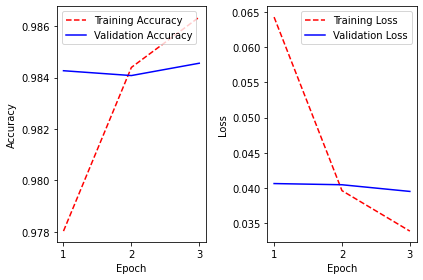

In [57]:
get_plots(history)

In [58]:
model.load_weights("lstm_model.hdf5")
y_pred = model.predict(x_test, batch_size=1024, verbose=1)

153164/153164 [==============================] - 28s 182us/step


In [59]:
predict_scores(y_pred)

Test set score is 0.9825377878792899


We see fairly good results here, a great improve from **Benchmark model**. We will explore some more architectures and based on our experiment we chose the final model.

In [60]:
gc.collect()

5194

### **Pooled GRU**

**Gated recurrent units (GRUs)** are a gating mechanism in recurrent neural networks, introduced in 2014 by [Kyunghyun Cho et al.](https://arxiv.org/abs/1406.1078). The GRU is like a long short-term memory (LSTM) with forget gate but has fewer parameters than LSTM, as it lacks an output gate. This implementation is partially based on this paper [Empirical Evaluation of RNN Architectures on Sentence Classification Task](https://arxiv.org/abs/1609.09171).



In [0]:
def get_pooled_gru():

  model_input = Input(shape=(maxlen, ))

  x = Embedding(max_features, embed_size, weights=[embedding_matrix])(model_input)

  x = SpatialDropout1D(0.2)(x)

  x = Bidirectional(GRU(128, return_sequences=True))(x)

  avg_pool = GlobalAveragePooling1D()(x)
  max_pool = GlobalMaxPooling1D()(x)
  conc = concatenate([avg_pool, max_pool])

  outp = Dense(6, activation="sigmoid")(conc)
      
  model = Model(inputs=model_input, outputs=outp)
  model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
  return model

In [0]:
batch_size = 128
epochs = 3

model = get_pooled_gru()

# Use stratified sampling again
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.1)

In [0]:
checkpoint = ModelCheckpoint("pooled_gru_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [ra_val,checkpoint, early]

In [66]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 200, 300)     30000000    input_3[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 200, 300)     0           embedding_3[0][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 200, 256)     329472      spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

In [67]:
%%time
history = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list,verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 786s 5ms/step - loss: 0.0559 - accuracy: 0.9804 - val_loss: 0.0417 - val_accuracy: 0.9837

 ROC-AUC - epoch: 1 - score: 0.988604

Epoch 00001: val_accuracy improved from -inf to 0.98373, saving model to pooled_gru_model.hdf5
Epoch 2/3
143613/143613 [==============================] - 787s 5ms/step - loss: 0.0370 - accuracy: 0.9853 - val_loss: 0.0395 - val_accuracy: 0.9843

 ROC-AUC - epoch: 2 - score: 0.990898

Epoch 00002: val_accuracy improved from 0.98373 to 0.98434, saving model to pooled_gru_model.hdf5
Epoch 3/3
143613/143613 [==============================] - 781s 5ms/step - loss: 0.0309 - accuracy: 0.9876 - val_loss: 0.0410 - val_accuracy: 0.9835

 ROC-AUC - epoch: 3 - score: 0.990144

Epoch 00003: val_accuracy did not improve from 0.98434
CPU times: user 1h 29min 52s, sys: 14min 39s, total: 1h 44min 31s
Wall time: 40min 54s


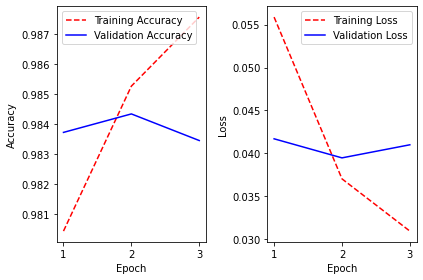

In [68]:
get_plots(history)

In [69]:
model.load_weights("pooled_gru_model.hdf5")
y_pred = model.predict(x_test,batch_size=1024,verbose=1)

153164/153164 [==============================] - 13s 83us/step


In [70]:
predict_scores(y_pred)

Test set score is 0.9837078294625575


In [71]:
gc.collect()

5292

### **Pooled GRU + CNN**

This implementation is based on the paper [Combination of Convolutional and Recurrent Neural Network for
Sentiment Analysis of Short Texts](https://www.aclweb.org/anthology/C16-1229.pdf) and [A C-LSTM Neural Network for Text Classification](https://arxiv.org/abs/1511.08630). This architechture uses a combination of **Bi-directional Gated Recurrent Network(GRU)** and **Convolutional Neural Network (ConvNet/CNN)** with pooling.

In [0]:
def get_gru_cnn():
    model_input = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(model_input)
    x1 = SpatialDropout1D(0.2)(x)
   
    x = Bidirectional(GRU(128, return_sequences = True))(x1)
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)

    y = Bidirectional(LSTM(128, return_sequences = True))(x1)
    y = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(y)

    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)

    avg_pool2 = GlobalAveragePooling1D()(y)
    max_pool2 = GlobalMaxPooling1D()(y)

    x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])
    
    preds = Dense(6, activation="sigmoid")(x)
    model = Model(model_input, preds)
    model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3,decay = 0),metrics=['accuracy'])
    return model

In [0]:
batch_size = 128
epochs = 3

model = get_gru_cnn()

# Use stratified sampling again
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.1)

In [0]:
checkpoint = ModelCheckpoint("gru_cnn_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [ra_val,checkpoint, early]

In [82]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 200, 300)     30000000    input_6[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_4 (SpatialDro (None, 200, 300)     0           embedding_6[0][0]                
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 200, 256)     329472      spatial_dropout1d_4[0][0]        
____________________________________________________________________________________________

In [83]:
%%time
history = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list,verbose=1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 1312s 9ms/step - loss: 0.0544 - accuracy: 0.9804 - val_loss: 0.0454 - val_accuracy: 0.9827

 ROC-AUC - epoch: 1 - score: 0.987671

Epoch 00001: val_accuracy improved from -inf to 0.98269, saving model to gru_cnn_model.hdf5
Epoch 2/3
143613/143613 [==============================] - 1315s 9ms/step - loss: 0.0418 - accuracy: 0.9838 - val_loss: 0.0401 - val_accuracy: 0.9844

 ROC-AUC - epoch: 2 - score: 0.990236

Epoch 00002: val_accuracy improved from 0.98269 to 0.98436, saving model to gru_cnn_model.hdf5
Epoch 3/3
143613/143613 [==============================] - 1310s 9ms/step - loss: 0.0395 - accuracy: 0.9846 - val_loss: 0.0403 - val_accuracy: 0.9841

 ROC-AUC - epoch: 3 - score: 0.990531

Epoch 00003: val_accuracy did not improve from 0.98436
CPU times: user 2h 34min 44s, sys: 25min 3s, total: 2h 59min 48s
Wall time: 1h 8min 32s


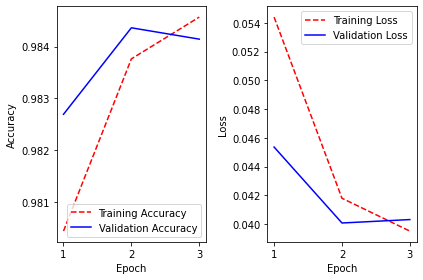

In [84]:
get_plots(history)

In [85]:
model.load_weights("gru_cnn_model.hdf5")
y_pred = model.predict(x_test,batch_size=1024,verbose=1)

153164/153164 [==============================] - 27s 173us/step


In [86]:
predict_scores(y_pred)

Test set score is 0.9830642261822655


### **Pooled CNN Complex Model**

This is a deep neural architechture with multiple Convolutional Neural Network (ConvNet/CNN) layers. This implementation is based on [Very Deep Convolutional Networks for Text Classification](https://arxiv.org/abs/1606.01781), [Combining Knowledge with Deep Convolutional Neural Networks
for Short Text Classification](http://yellowstone.cs.ucla.edu/~jinwang/jinwang_files/ijcai2017.pdf) and [Attention pooling-based convolutional neural network for sentence modelling](https://www.sciencedirect.com/science/article/pii/S0020025516306673).


In [0]:
#Custom Attention Layer
from keras.engine import InputSpec, Layer
from keras import backend as K

class AttentionWeightedAverage(Layer):
    """
    Computes a weighted average of the different channels across timesteps.
    Uses 1 parameter pr. channel to compute the attention value for a single timestep.
    """

    def __init__(self, return_attention=False, **kwargs):
        self.init = initializers.get('uniform')
        self.supports_masking = True
        self.return_attention = return_attention
        super(AttentionWeightedAverage, self).__init__(** kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(ndim=3)]
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[2], 1),
                                 name='{}_W'.format(self.name),
                                 initializer=self.init)
        self.trainable_weights = [self.W]
        super(AttentionWeightedAverage, self).build(input_shape)

    def call(self, x, mask=None):
        # computes a probability distribution over the timesteps
        # uses 'max trick' for numerical stability
        # reshape is done to avoid issue with Tensorflow
        # and 1-dimensional weights
        logits = K.dot(x, self.W)
        x_shape = K.shape(x)
        logits = K.reshape(logits, (x_shape[0], x_shape[1]))
        ai = K.exp(logits - K.max(logits, axis=-1, keepdims=True))

        # masked timesteps have zero weight
        if mask is not None:
            mask = K.cast(mask, K.floatx())
            ai = ai * mask
        att_weights = ai / (K.sum(ai, axis=1, keepdims=True) + K.epsilon())
        weighted_input = x * K.expand_dims(att_weights)
        result = K.sum(weighted_input, axis=1)
        if self.return_attention:
            return [result, att_weights]
        return result

    def get_output_shape_for(self, input_shape):
        return self.compute_output_shape(input_shape)

    def compute_output_shape(self, input_shape):
        output_len = input_shape[2]
        if self.return_attention:
            return [(input_shape[0], output_len), (input_shape[0], input_shape[1])]
        return (input_shape[0], output_len)

    def compute_mask(self, input, input_mask=None):
        if isinstance(input_mask, list):
            return [None] * len(input_mask)
        else:
            return None


In [0]:
 def get_avcnn_model():   
    filter_nums = 300
    model_input = Input(shape=(maxlen,), dtype='int32')

    embedding_layer = Embedding(num_words,
                                    embed_size,
                                    weights=[embedding_matrix],
                                    input_length=maxlen,
                                    trainable=False)
    embedded_sequences = embedding_layer(model_input)
    embedded_sequences = SpatialDropout1D(0.25)(embedded_sequences)

    conv_0 = Conv1D(filter_nums, 1, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_1 = Conv1D(filter_nums, 2, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_2 = Conv1D(filter_nums, 3, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_3 = Conv1D(filter_nums, 4, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)

    attn_0 = AttentionWeightedAverage()(conv_0)
    avg_0 = GlobalAveragePooling1D()(conv_0)
    maxpool_0 = GlobalMaxPooling1D()(conv_0)

    maxpool_1 = GlobalMaxPooling1D()(conv_1)
    attn_1 = AttentionWeightedAverage()(conv_1)
    avg_1 = GlobalAveragePooling1D()(conv_1)

    maxpool_2 = GlobalMaxPooling1D()(conv_2)
    attn_2 = AttentionWeightedAverage()(conv_2)
    avg_2 = GlobalAveragePooling1D()(conv_2)

    maxpool_3 = GlobalMaxPooling1D()(conv_3)
    attn_3 = AttentionWeightedAverage()(conv_3)
    avg_3 = GlobalAveragePooling1D()(conv_3)

    v0_col = concatenate([maxpool_0, maxpool_1, maxpool_2, maxpool_3], axis=1)
    v1_col = concatenate([attn_0, attn_1, attn_2, attn_3], axis=1)
    v2_col = concatenate([avg_1, avg_2, avg_0, avg_3], axis=1)
    merged_tensor = concatenate([v0_col, v1_col, v2_col], axis=1)
    output = Dropout(0.7)(merged_tensor)
    output = Dense(units=144)(output)
    output = Activation('relu')(output)
    output = Dense(units=6, activation='sigmoid')(output)

    model = Model(inputs=model_input, outputs=output)
    adam_optimizer = optimizers.Adam(lr=1e-3, decay=1e-6)
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

    return model

In [0]:
batch_size = 128
epochs = 10

model = get_avcnn_model()

# Use stratified sampling again
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.1)

In [0]:
checkpoint = ModelCheckpoint("avcnn_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [ra_val,checkpoint, early]

In [91]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 200, 300)     30000000    input_7[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_5 (SpatialDro (None, 200, 300)     0           embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 200, 300)     90300       spatial_dropout1d_5[0][0]        
____________________________________________________________________________________________

In [92]:
%%time
history = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list,verbose=1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/10
143613/143613 [==============================] - 39s 275us/step - loss: 0.0586 - accuracy: 0.9796 - val_loss: 0.0424 - val_accuracy: 0.9835

 ROC-AUC - epoch: 1 - score: 0.984670

Epoch 00001: val_accuracy improved from -inf to 0.98351, saving model to avcnn_model.hdf5
Epoch 2/10
143613/143613 [==============================] - 39s 270us/step - loss: 0.0458 - accuracy: 0.9823 - val_loss: 0.0469 - val_accuracy: 0.9830

 ROC-AUC - epoch: 2 - score: 0.986831

Epoch 00002: val_accuracy did not improve from 0.98351
Epoch 3/10
143613/143613 [==============================] - 39s 270us/step - loss: 0.0434 - accuracy: 0.9830 - val_loss: 0.0416 - val_accuracy: 0.9836

 ROC-AUC - epoch: 3 - score: 0.987222

Epoch 00003: val_accuracy improved from 0.98351 to 0.98356, saving model to avcnn_model.hdf5
Epoch 4/10
143613/143613 [==============================] - 39s 270us/step - loss: 0.0417 - accuracy: 0.9835 - val_loss: 0.0404 - val_accu

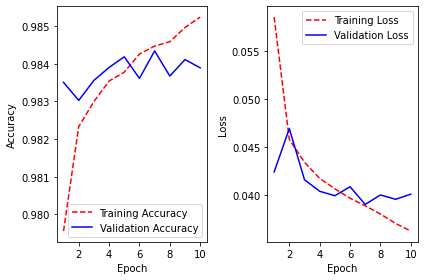

In [93]:
get_plots(history)

In [94]:
model.load_weights("avcnn_model.hdf5")
y_pred = model.predict(x_test,batch_size=1024,verbose=1)

153164/153164 [==============================] - 11s 74us/step


In [95]:
predict_scores(y_pred)

Test set score is 0.9834187159752039


In [96]:
gc.collect()

26045

### **Pooled RNN Complex Model**

This is a deep neural architechture with multiple **Gated Recurrent Network (GRU)** layers.


In [0]:
from keras.layers import Lambda
def get_av_rnn():
    recurrent_units = 60
    model_input = Input(shape=(maxlen,))
    embedding_layer = Embedding(num_words,
                                    embed_size,
                                    weights=[embedding_matrix],
                                    input_length=maxlen,
                                    trainable=False)
    embedded_sequences = embedding_layer(model_input)
    embedding_layer = SpatialDropout1D(0.25)(embedded_sequences)

    rnn_1 = Bidirectional(GRU(recurrent_units, return_sequences=True))(embedding_layer)
    rnn_2 = Bidirectional(GRU(recurrent_units, return_sequences=True))(rnn_1)
    x = concatenate([rnn_1, rnn_2], axis=2)

    last = Lambda(lambda t: t[:, -1], name='last')(x)
    maxpool = GlobalMaxPooling1D()(x)
    attn = AttentionWeightedAverage()(x)
    average = GlobalAveragePooling1D()(x)

    all_views = concatenate([last, maxpool, average, attn], axis=1)
    x = Dropout(0.5)(all_views)
    x = Dense(144, activation="relu")(x)
    output_layer = Dense(units=6, activation="sigmoid")(x)
    model = Model(inputs=model_input, outputs=output_layer)
    adam_optimizer = optimizers.Adam(lr=1e-3, decay=1e-6, clipvalue=5)
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
    return model

In [0]:
batch_size = 256
epochs = 5

model = get_av_rnn()

# Use stratified sampling again
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.1)

In [0]:
checkpoint = ModelCheckpoint("avrnn_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [ra_val,checkpoint, early]

In [105]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 200, 300)     30000000    input_9[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_7 (SpatialDro (None, 200, 300)     0           embedding_9[0][0]                
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 200, 120)     129960      spatial_dropout1d_7[0][0]        
____________________________________________________________________________________________

In [106]:
%%time
history = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list,verbose=1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/5
143613/143613 [==============================] - 772s 5ms/step - loss: 0.0623 - accuracy: 0.9783 - val_loss: 0.0435 - val_accuracy: 0.9831

 ROC-AUC - epoch: 1 - score: 0.982639

Epoch 00001: val_accuracy improved from -inf to 0.98311, saving model to avrnn_model.hdf5
Epoch 2/5
143613/143613 [==============================] - 769s 5ms/step - loss: 0.0452 - accuracy: 0.9827 - val_loss: 0.0413 - val_accuracy: 0.9840

 ROC-AUC - epoch: 2 - score: 0.987721

Epoch 00002: val_accuracy improved from 0.98311 to 0.98403, saving model to avrnn_model.hdf5
Epoch 3/5
143613/143613 [==============================] - 771s 5ms/step - loss: 0.0424 - accuracy: 0.9835 - val_loss: 0.0398 - val_accuracy: 0.9844

 ROC-AUC - epoch: 3 - score: 0.989199

Epoch 00003: val_accuracy improved from 0.98403 to 0.98442, saving model to avrnn_model.hdf5
Epoch 4/5
143613/143613 [==============================] - 767s 5ms/step - loss: 0.0404 - accuracy: 0.9841

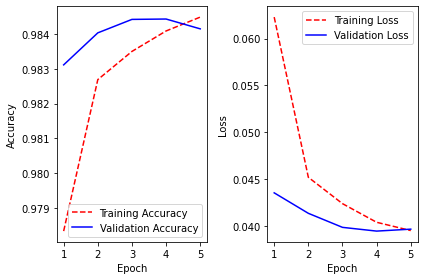

In [107]:
get_plots(history)

In [108]:
model.load_weights("avrnn_model.hdf5")
y_pred = model.predict(x_test,batch_size=1024,verbose=1)

153164/153164 [==============================] - 20s 132us/step


In [109]:
predict_scores(y_pred)

Test set score is 0.983716751044319


In [110]:
gc.collect()

23227

### **Deep CNN with K-Max Pooling**

As per [A Convolutional Neural Network for Modelling Sentences](https://arxiv.org/pdf/1404.2188.pdf), k-Max Pooling is a pooling operation that is a generalisation of the max pooling over the time dimension used in the Max-TDNN sentence model and different from the local max pooling operations applied in a convolutional network for object recognition. Here we implement a deep CNN network with K-Max pooling.

![image](https://drive.google.com/open?id=11RzC6SopVgp6_d09q-pJjwTfh8iR6x6G)

In [0]:
class KMaxPooling(Layer):
    """
    K-max pooling layer that extracts the k-highest activations from a sequence (2nd dimension).
    TensorFlow backend.
    """

    def __init__(self, k=1, **kwargs):
        super().__init__(**kwargs)
        self.input_spec = InputSpec(ndim=3)
        self.k = k

    def compute_output_shape(self, input_shape):
        return (input_shape[0], (input_shape[2] * self.k))

    def call(self, inputs):
        # swap last two dimensions since top_k will be applied along the last dimension
        shifted_input = tf.transpose(inputs, [0, 2, 1])

        # extract top_k, returns two tensors [values, indices]
        top_k = tf.nn.top_k(shifted_input, k=self.k, sorted=True, name=None)[0]

        # return flattened output
        return Flatten()(top_k)

In [0]:
def get_kmax_text_cnn():
    embedding_layer = Embedding(num_words,
                                    embed_size,
                                    weights=[embedding_matrix],
                                    input_length=maxlen,
                                    trainable=False)

    filter_nums = 180
    drop = 0.6

    model_input = Input(shape=(maxlen,), dtype='int32')
    embedded_sequences = embedding_layer(model_input)
    embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)

    conv_0 = Conv1D(filter_nums, 1, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_1 = Conv1D(filter_nums, 2, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_2 = Conv1D(filter_nums, 3, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_3 = Conv1D(filter_nums, 4, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)

    maxpool_0 = KMaxPooling(k=3)(conv_0)
    maxpool_1 = KMaxPooling(k=3)(conv_1)
    maxpool_2 = KMaxPooling(k=3)(conv_2)
    maxpool_3 = KMaxPooling(k=3)(conv_3)

    merged_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2, maxpool_3], axis=1)
    output = Dropout(drop)(merged_tensor)
    output = Dense(units=144, activation='relu')(output)
    output = Dense(units=6, activation='sigmoid')(output)

    model = Model(inputs=model_input, outputs=output)
    adam_optimizer = optimizers.Adam(lr=1e-3, decay=1e-7)
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
    return model

In [0]:
batch_size = 256
epochs = 10

model = get_kmax_text_cnn()

# Use stratified sampling again
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.1)

In [0]:
checkpoint = ModelCheckpoint("kmaxcnn_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [ra_val,checkpoint, early]

In [115]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 200, 300)     30000000    input_10[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_8 (SpatialDro (None, 200, 300)     0           embedding_10[0][0]               
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 200, 180)     54180       spatial_dropout1d_8[0][0]        
____________________________________________________________________________________________

In [116]:
%%time
history = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list,verbose=1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/10
143613/143613 [==============================] - 122s 851us/step - loss: 0.0665 - accuracy: 0.9775 - val_loss: 0.0458 - val_accuracy: 0.9822

 ROC-AUC - epoch: 1 - score: 0.981390

Epoch 00001: val_accuracy improved from -inf to 0.98225, saving model to kmaxcnn_model.hdf5
Epoch 2/10
143613/143613 [==============================] - 121s 845us/step - loss: 0.0474 - accuracy: 0.9819 - val_loss: 0.0425 - val_accuracy: 0.9832

 ROC-AUC - epoch: 2 - score: 0.986898

Epoch 00002: val_accuracy improved from 0.98225 to 0.98325, saving model to kmaxcnn_model.hdf5
Epoch 3/10
143613/143613 [==============================] - 121s 845us/step - loss: 0.0441 - accuracy: 0.9830 - val_loss: 0.0407 - val_accuracy: 0.9836

 ROC-AUC - epoch: 3 - score: 0.988519

Epoch 00003: val_accuracy improved from 0.98325 to 0.98358, saving model to kmaxcnn_model.hdf5
Epoch 4/10
143613/143613 [==============================] - 121s 845us/step - loss: 0.0421 

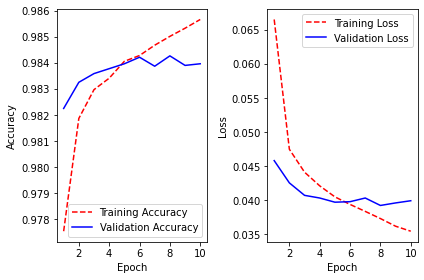

In [117]:
get_plots(history)

In [118]:
model.load_weights("kmaxcnn_model.hdf5")
y_pred = model.predict(x_test,batch_size=1024,verbose=1)

153164/153164 [==============================] - 103s 673us/step


In [119]:
predict_scores(y_pred)

Test set score is 0.9840017283377253


In [120]:
gc.collect()

28089

### **Results with Fast-Text Embeddings**

After first round of experiment, we take a look at the performance of the models. We used **iterative_train_test_split** from the scikit-multilearn package to keep the toxicity labels evenly distributed between training and validation sets. We used the the custom function to calclated ROC-AUC Score on the test data set.

Here's our results:-


| Model               | Test-set ROC AUC score |
|---------------------|------------------------|
| Logistic Regression | 0.9765                 |
| Support Vector Machine          | 0.9728                |
| Single Bi-LSTM        | 0.9825                 |
| Single GRU          | 0.9837                |
| GRU with CNN       | 0.9831                 |
| Deep CNN           | 0.9834                 |
| Deep RNN          | 0.9837                 |
| Deep CNN with KMax Pooling          | 0.9842                 |



Time Performance

| Model               | Hardware| Epochs |Time |
|---------------------|------------------------|------------------------|------------------------|
| Logistic Regression | CPU     |              | 12 mins|
| Support Vector Machine          | CPU      |            | 14 mins|
| Single Bi-LSTM        | GPU        |     3      | 34 mins|
| Single GRU           | GPU           |   3   |   1hr 1min  | 
| GRU with CNN        | GPU       |   3       |     |
| Deep CNN           |GPU         |     10    |    |
| Deep RNN        | GPU        |     3     |     |
| Deep CNN with KMax Pooling          | GPU        |     10     |     |

What we can observe is the neural newtork models performed much better than the benchmark model.

For the second round of experminents, we will select the Top four Performing models from the First Round.





*   GRU with CNN
*   Deep CNN
*   Deep RNN
*   Deep CNN with KMax Pooling







## **A Little More Experminent**

In this section, we will utilise the top four models from previous round and will try to improve our performance.

We will perform three methodologies here:-


*   **Diversify** Word Embeddings
*   **Re-train** using new diversified Word Embeddings
* **Ensemble** the top two models.



### **Diversify Pre-trained Word Embeddings**

We will use another pre-trained Word Embedding [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/) - Glove Twitter - 2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors. You can download it [here](http://nlp.stanford.edu/data/glove.840B.300d.zip) and read about it in the original paper [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/pubs/glove.pdf)

**GloVe** is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

Sp, here we will use both a **GloVe** vector and a **FastText** together. 

In [121]:
!ls "/content/drive/My Drive/toxicity-classification/embedding/"

crawl-300d-2M.vec  glove.twitter.27B.200d.txt


In [0]:
def get_emdbeddings_index(EMBEDDING_FILE):
    embeddings_index = {}
    with open(EMBEDDING_FILE, encoding='utf8') as f:
        for line in f:
            values = line.rstrip().rsplit(' ')
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
            gc.collect()
    return embeddings_index

In [123]:
%%time
# Load the FastText Web Crawl vectors and Glove vectors
EMBEDDING_FILE_FASTTEXT='/content/drive/My Drive/toxicity-classification/embedding//crawl-300d-2M.vec'
EMBEDDING_FILE_GLOVE='/content/drive/My Drive/toxicity-classification/embedding/glove.twitter.27B.200d.txt'
gc.collect()

def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')

embeddings_index_ft = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE_FASTTEXT,encoding='utf-8'))
gc.collect()
embeddings_index_tw = dict(get_coefs(*o.strip().split()) for o in open(EMBEDDING_FILE_GLOVE,encoding='utf-8'))
gc.collect()


CPU times: user 3min 7s, sys: 3.34 s, total: 3min 10s
Wall time: 3min 16s


In [124]:
%%time
import gensim
spell_model = gensim.models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE_FASTTEXT)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 8min 1s, sys: 1.11 s, total: 8min 3s
Wall time: 8min 3s


In [125]:
%%time
# This code is  based on: Spellchecker using Word2vec by CPMP
# https://www.kaggle.com/cpmpml/spell-checker-using-word2vec

words = spell_model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

# Use fast text as vocabulary
def words(text): return re.findall(r'\w+', text.lower())

def P(word): 
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def singlify(word):
    return "".join([letter for i,letter in enumerate(word) if i == 0 or letter != word[i-1]])

CPU times: user 807 ms, sys: 0 ns, total: 807 ms
Wall time: 807 ms


In [0]:
%%time
max_features = 283759
maxlen = 900

word_index = token.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words,501))

something_tw = embeddings_index_tw.get("something")
something_ft = embeddings_index_ft.get("something")

something = np.zeros((501,))
something[:300,] = something_ft
something[300:500,] = something_tw
something[500,] = 0
gc.collect()

def all_caps(word):
    return len(word) > 1 and word.isupper()

def embed_word(embedding_matrix,i,word):
    embedding_vector_ft = embeddings_index_ft.get(word)
    gc.collect()
    if embedding_vector_ft is not None: 
        if all_caps(word):
            last_value = np.array([1])
        else:
            last_value = np.array([0])
        embedding_matrix[i,:300] = embedding_vector_ft
        embedding_matrix[i,500] = last_value
        embedding_vector_tw = embeddings_index_tw.get(word)
        if embedding_vector_tw is not None:
            embedding_matrix[i,300:500] = embedding_vector_tw

            
# Fasttext vector is used by itself if there is no glove vector but not the other way around.
for word, i in word_index.items():
    gc.collect()
    if i >= max_features: continue
        
    if embeddings_index_ft.get(word) is not None:
        embed_word(embedding_matrix,i,word)
    else:
        
        if len(word) > 20:
            embedding_matrix[i] = something
        else:
            word2 = correction(word)
            if embeddings_index_ft.get(word2) is not None:
                embed_word(embedding_matrix,i,word2)
            else:
                word2 = correction(singlify(word))
                if embeddings_index_ft.get(word2) is not None:
                    embed_word(embedding_matrix,i,word2)
                else:
                    embedding_matrix[i] = something 

In [0]:
import pickle
with open('combined_embeddings.pickle', ‘wb’) as f:
    pickle.dump(embedding_matrix, f)


In [0]:
with open('combined_embeddings.pickle', ‘rb’) as f:
    embedding_matrix = pickle.load(f)

### **Re-Training using new Diverse Embeddings**

In [0]:
# model_input same for each model
model_input = Input(shape=(maxlen,), dtype='int32')
embed_size = 501


We will use the same models from the first round, the only change in these implementations will be a common **input layer** and a new **embedding layer** with diverse embeddings.

In [0]:
#model1 Pooled GRU with CNN Model
def get_model1(model_input):
  
  embedding_layer = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)
  x = embedding_layer(model_input)
  x1 = SpatialDropout1D(0.2)(x)

  x = Bidirectional(GRU(128, return_sequences=True))(x1)
  x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)

  y = Bidirectional(GRU(128, return_sequences=True))(x1)
  y = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(y)

  avg_pool1 = GlobalAveragePooling1D()(x)
  max_pool1 = GlobalMaxPooling1D()(x)

  avg_pool2 = GlobalAveragePooling1D()(y)
  max_pool2 = GlobalMaxPooling1D()(y)

  x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])

  preds = Dense(6, activation="sigmoid")(x)
  model = Model(model_input, preds)
  model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy'])

  return model

In [0]:
#model2 Pooled CNN Complex Model
def get_model2(model_input):   
    filter_nums = 300
    
    embedding_layer = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)
    embedded_sequences = embedding_layer(model_input)
    embedded_sequences = SpatialDropout1D(0.25)(embedded_sequences)

    conv_0 = Conv1D(filter_nums, 1, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_1 = Conv1D(filter_nums, 2, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_2 = Conv1D(filter_nums, 3, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_3 = Conv1D(filter_nums, 4, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)

    attn_0 = AttentionWeightedAverage()(conv_0)
    avg_0 = GlobalAveragePooling1D()(conv_0)
    maxpool_0 = GlobalMaxPooling1D()(conv_0)

    maxpool_1 = GlobalMaxPooling1D()(conv_1)
    attn_1 = AttentionWeightedAverage()(conv_1)
    avg_1 = GlobalAveragePooling1D()(conv_1)

    maxpool_2 = GlobalMaxPooling1D()(conv_2)
    attn_2 = AttentionWeightedAverage()(conv_2)
    avg_2 = GlobalAveragePooling1D()(conv_2)

    maxpool_3 = GlobalMaxPooling1D()(conv_3)
    attn_3 = AttentionWeightedAverage()(conv_3)
    avg_3 = GlobalAveragePooling1D()(conv_3)

    v0_col = concatenate([maxpool_0, maxpool_1, maxpool_2, maxpool_3], axis=1)
    v1_col = concatenate([attn_0, attn_1, attn_2, attn_3], axis=1)
    v2_col = concatenate([avg_1, avg_2, avg_0, avg_3], axis=1)
    merged_tensor = concatenate([v0_col, v1_col, v2_col], axis=1)
    output = Dropout(0.7)(merged_tensor)
    output = Dense(units=144)(output)
    output = Activation('relu')(output)
    output = Dense(units=6, activation='sigmoid')(output)

    model = Model(inputs=model_input, outputs=output)
    adam_optimizer = optimizers.Adam(lr=1e-3, decay=1e-6)
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

    return model

In [0]:
#Model3 Pooled RNN Model
def get_model3(model_input):
    recurrent_units = 60
    
    embedding_layer = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)
    embedded_sequences = embedding_layer(model_input)
    embedding_layer = SpatialDropout1D(0.25)(embedded_sequences)

    rnn_1 = Bidirectional(GRU(recurrent_units, return_sequences=True))(embedding_layer)
    rnn_2 = Bidirectional(GRU(recurrent_units, return_sequences=True))(rnn_1)
    x = concatenate([rnn_1, rnn_2], axis=2)

    last = Lambda(lambda t: t[:, -1], name='last')(x)
    maxpool = GlobalMaxPooling1D()(x)
    attn = AttentionWeightedAverage()(x)
    average = GlobalAveragePooling1D()(x)

    all_views = concatenate([last, maxpool, average, attn], axis=1)
    x = Dropout(0.5)(all_views)
    x = Dense(144, activation="relu")(x)
    output_layer = Dense(units=6, activation="sigmoid")(x)

    model = Model(inputs=model_input, outputs=output_layer)
    adam_optimizer = optimizers.Adam(lr=1e-3, decay=1e-6, clipvalue=5)
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
    return model

In [0]:
#Model4 KMax Text CNN
def get_model4(model_input):
    
    embedding_layer = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)

    filter_nums = 180
    drop = 0.6

    
    embedded_sequences = embedding_layer(model_input)
    embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)

    conv_0 = Conv1D(filter_nums, 1, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_1 = Conv1D(filter_nums, 2, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_2 = Conv1D(filter_nums, 3, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)
    conv_3 = Conv1D(filter_nums, 4, kernel_initializer="normal", padding="valid", activation="relu")(embedded_sequences)

    maxpool_0 = KMaxPooling(k=3)(conv_0)
    maxpool_1 = KMaxPooling(k=3)(conv_1)
    maxpool_2 = KMaxPooling(k=3)(conv_2)
    maxpool_3 = KMaxPooling(k=3)(conv_3)

    merged_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2, maxpool_3], axis=1)
    output = Dropout(drop)(merged_tensor)
    output = Dense(units=144, activation='relu')(output)
    output = Dense(units=6, activation='sigmoid')(output)

    model = Model(inputs=model_input, outputs=output)
    adam_optimizer = optimizers.Adam(lr=1e-3, decay=1e-7)
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
    return model

In [0]:
batch_size = 128
epochs = 5

model1 = get_model1(model_input)

# Use stratified sampling again
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.1)

checkpoint = ModelCheckpoint("model1.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [ra_val,checkpoint, early]

model1history = model1.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list,verbose=1)

model1.load_weights("model1.hdf5")
y_pred = model.predict(x_test,batch_size=1024,verbose=1)

predict_scores(y_pred)

In [0]:
batch_size = 128
epochs = 10

model2 = get_model2(model_input)

# Use stratified sampling again
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.1)

checkpoint = ModelCheckpoint("model2.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [ra_val,checkpoint, early]

model2history = model2.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list,verbose=1)

model2.load_weights("model2.hdf5")
y_pred = model.predict(x_test,batch_size=1024,verbose=1)

predict_scores(y_pred)

In [0]:
batch_size = 128
epochs = 5

model3 = get_model3(model_input)

# Use stratified sampling again
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.1)

checkpoint = ModelCheckpoint("model3.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [ra_val,checkpoint, early]

model3history = model3.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list,verbose=1)

model3.load_weights("model3.hdf5")
y_pred = model.predict(x_test,batch_size=1024,verbose=1)

predict_scores(y_pred)

In [0]:
batch_size = 128
epochs = 10

model4 = get_model4(model_input)

# Use stratified sampling again
X_tra, y_tra, X_val, y_val = iterative_train_test_split(x_train, y_train, test_size=0.1)

checkpoint = ModelCheckpoint("model4.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list = [ra_val,checkpoint, early]

model4history = model4.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list,verbose=1)

model4.load_weights("model4.hdf5")
y_pred = model.predict(x_test,batch_size=1024,verbose=1)

predict_scores(y_pred)

In [0]:
# Get training and test loss histories
training_accuracy = model1history.history['accuracy']
validation_accuracy = model1history.history['val_accuracy']
# Create count of the number of epochs
epoch_count_1 = range(1, len(training_accuracy) + 1)

# Visualize loss history
plt.subplot(2, 2, 1)
plt.plot(epoch_count_1, training_accuracy, 'r--')
plt.plot(epoch_count_1, validation_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Get training and test loss histories
training_loss = model1history.history['loss']
validation_loss = model1history.history['val_loss']

# Create count of the number of epochs
epoch_count_2 = range(1, len(training_loss) + 1)

# Visualize loss history
plt.subplot(2, 2, 2)
plt.plot(epoch_count_2, training_loss, 'r--')
plt.plot(epoch_count_2, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Get training and test loss histories
training_accuracy = model2history.history['accuracy']
validation_accuracy = model2history.history['val_accuracy']
# Create count of the number of epochs
epoch_count_1 = range(1, len(training_accuracy) + 1)

# Visualize loss history
plt.subplot(2, 2, 3)
plt.plot(epoch_count_1, training_accuracy, 'r--')
plt.plot(epoch_count_1, validation_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Get training and test loss histories
training_loss = model2history.history['loss']
validation_loss = model2history.history['val_loss']

# Create count of the number of epochs
epoch_count_2 = range(1, len(training_loss) + 1)

# Visualize loss history
plt.subplot(2, 2, 4)
plt.plot(epoch_count_2, training_loss, 'r--')
plt.plot(epoch_count_2, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')




plt.tight_layout()

plt.show();

### **Ensemble**

In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. This is referenced from [Popular Ensemble Methods: An Empirical Study](https://arxiv.org/abs/1106.0257).

If you look at results of a top machine learning competitions on Kaggle, you will most likely find that the top results are achieved by an ensemble of models rather than a single model.

There are many different types of ensembles; stacking is one of them. It is one of the more general types and can theoretically represent any other ensemble technique. Stacking involves training a learning algorithm to combine the predictions of several other learning algorithms. In this project, We will use one of the simplest forms of Stacking, which involves taking an average of outputs of models in the ensemble. Here we have already trained our models, so we will use those trained models, load their weights and take the average of their outputs.

For ensemble, I will use the top three performing models.

In [0]:
model2.load_weights("model2.hdf5")
model3.load_weights("model3.hdf5")
model4.load_weights("model4.hdf5")

models = [model2, model3, model4]

In [0]:
from keras.layers import Average
def ensemble(models, model_input):
    
    outputs = [model.outputs[0] for model in models]
    y = Average()(outputs)
    
    model = Model(model_input, y, name='ensemble')
    
    return model

In [0]:
ensemble_model = ensemble(models, model_input)


In [0]:
y_pred = ensemble_model.predict(x_test,batch_size=1024,verbose=1)
predict_scores(y_pred)